# Интерполяция параметрически заданной функции

Рассмотрим задачу поиска интерполирующей кривой по точкам
$p_1, p_2, \dots, p_n$, $p_i = (x_i, y_i)$ ($i=1,\dots,n$).
Предположим, что форму этой кривой
нельзя описать функцией вида $y=f(x)$. Например, этого нельзя сделать
для кривой в форме буквы S и др. (функция была бы неоднозначной).

Займемся решением задачи с подготовки данных. Нарисуем букву S и измерим координаты восьми точек на ней

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:
x = np.array([1, 4.5, 8, 6, 3, 1, 4.5, 8])
y = np.array([2, 1, 2, 4, 5, 7, 8, 7])

Изобразим полученные начальные данные, на которых заметен силуэт буквы S:

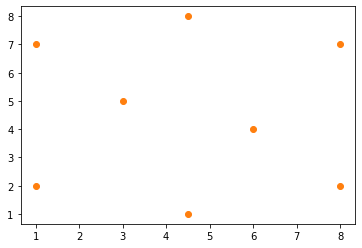

In [3]:
plt.plot(x, y, 'o', color='tab:orange')
pass

**Первый способ**

Приступим к решению задачи интерполяции. Первый способ заключается в следующем.
Рассмотрим два набора данных $(i, x_i)$ и $(i, y_i)$ ($i=1,\dots,n$).
Их можно независимо интерполировать функциями $f(t)$, $g(t)$. Тогда кривая,
заданная параметрически,
$$
\left\{
\begin{array}{l}
x=f(t) \\
y=g(t)
\end{array}
\right.
$$
будет интерполировать наши данные.

Подготовим массив индексов i и linspace для построения графика

In [4]:
i = np.array([1, 2, 3, 4, 5, 6, 7, 8])
t = np.linspace(1, 8, 500)

Интерполируем полученные данные **кубическим интерполянтом**

In [5]:
f = np.polyfit(i, x, 3)
g = np.polyfit(i, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

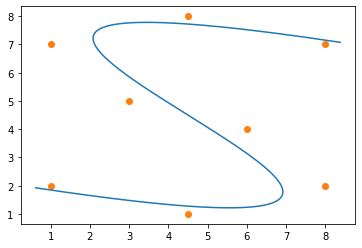

In [6]:
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(xx, yy, color="tab:blue")
pass

Итак, на графике появилась буква S, однако, довольно сильно отстраненная от изначальных точек

Теперь интерполируем полученные данные **кубическим сплайном**

In [7]:
f = interpolate.interp1d(i, x, kind='cubic')
g = interpolate.interp1d(i, y, kind='cubic')
xx = f(t)
yy = g(t)

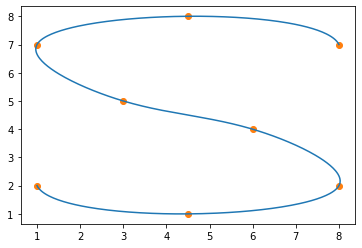

In [8]:
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(xx, yy, color="tab:blue")
pass

**Второй способ**

Другой способ – интерполировать данные $(\sum_{i=1}^{i-1} d_i, x_i)$
и $(\sum_{i=1}^{i-1} d_i, y_i)$ ($i=1,\dots,n$), где $d_i$ – расстояние между точками
$p_i$ и $p_{i+1}$.

Подготовим список расстояний между точками:

In [9]:
d = np.array([])
for i in range(len(x)-1):
    dist = np.sqrt((x[i + 1] - x[i]) ** 2 + (y[i + 1] - y[i]) ** 2)
    d = np.append(d, np.array(dist))
d

array([3.64005494, 3.64005494, 2.82842712, 3.16227766, 2.82842712,
       3.64005494, 3.64005494])

Подготовим список $d_i$ - необходимых сумм расстояний между точками

In [10]:
di = np.array([])
for j in range(len(x)):
    s = 0
    for i in range(j):
        s += d[i]
    di = np.append(di, s)
di

array([ 0.        ,  3.64005494,  7.28010989, 10.10853701, 13.27081467,
       16.0992418 , 19.73929674, 23.37935169])

Изменим linspace в соответствии с со списком $d_i$ для корректного постороения

In [11]:
t = np.linspace(0, 23, 500)

Интерполируем полученные данные **кубическим интерполянтом** 

In [12]:
f = np.polyfit(di, x, 3)
g = np.polyfit(di, y, 3)
xx = np.polyval(f, t)
yy = np.polyval(g, t)

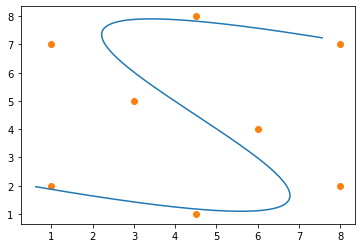

In [13]:
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(xx, yy, color="tab:blue")
pass

Результат схож с первым случаем, буква S видна, но далека от точек.

Теперь интерполируем полученные данные **кубическим сплайном**

In [14]:
f = interpolate.interp1d(di, x, kind='cubic')
g = interpolate.interp1d(di, y, kind='cubic')
xx = f(t)
yy = g(t)

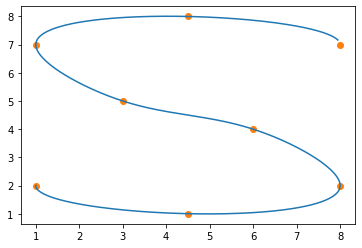

In [15]:
plt.plot(x, y, 'o', color='tab:orange')
plt.plot(xx, yy, color="tab:blue")
pass

**Выводы**

По полученным данным можно сделать ряд выводов:
1. Принципиальной разницы в полученных результатах первым и вторым способом нет, оба способа при определенной интерполяции дают практически идентичный результат
2. Интерполяция кубическим интерполянтом и кубическим сплайном дают относительно разные результаты. Кубический интерполянт получается плавным, но отдаленным от точек, заданных изначально. Кубический сплайн же дает наиболее четкую картину, отображая результат, масимально приближенный к реальности.